In [1]:
import pandas as pd
import numpy as np
import plot
from scipy.fft import fft, ifft

In [2]:
start = 200
end = 1800

result_01 = pd.read_csv('data/exp_pressure_01_cut.csv')
result_02 = pd.read_csv('data/exp_pressure_02_cut.csv')
result_03 = pd.read_csv('data/exp_pressure_02_cut.csv')

barometer_01_1 = result_01.iloc[:, 0].to_numpy()
barometer_01_2 = result_01.iloc[:, 1].to_numpy()
barometer_01_3 = result_01.iloc[:, 2].to_numpy()
barometer_01_4 = result_01.iloc[:, 3].to_numpy()
barometer_01_5 = result_01.iloc[:, 4].to_numpy()
barometer_01_6 = result_01.iloc[:, 5].to_numpy()

barometer_02_1 = result_02.iloc[:, 0].to_numpy()
barometer_02_2 = result_02.iloc[:, 1].to_numpy()
barometer_02_3 = result_02.iloc[:, 2].to_numpy()
barometer_02_4 = result_02.iloc[:, 3].to_numpy()
barometer_02_5 = result_02.iloc[:, 4].to_numpy()
barometer_02_6 = result_02.iloc[:, 5].to_numpy()

barometer_03_1 = result_03.iloc[:, 0].to_numpy()
barometer_03_2 = result_03.iloc[:, 1].to_numpy()
barometer_03_3 = result_03.iloc[:, 2].to_numpy()
barometer_03_4 = result_03.iloc[:, 3].to_numpy()
barometer_03_5 = result_03.iloc[:, 4].to_numpy()
barometer_03_6 = result_03.iloc[:, 5].to_numpy()

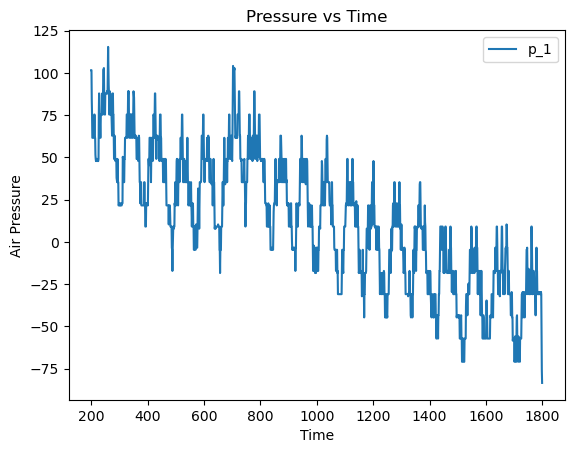

In [3]:

plot.plot_time_domain([barometer_02_6-np.mean(barometer_02_6)], start_idx=start, end_idx=end)

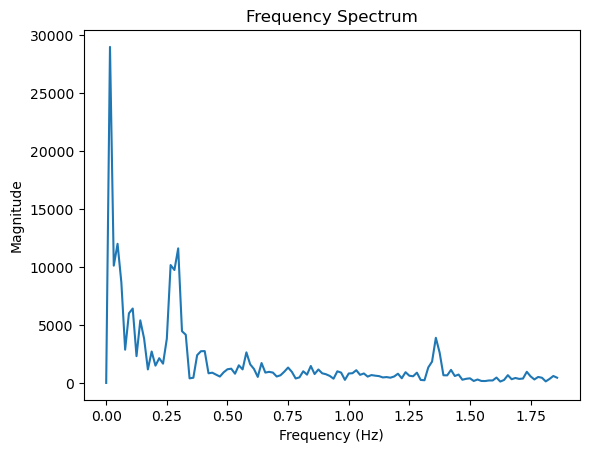

In [4]:
barometer_02_6[start:end] = barometer_02_6[start:end] - np.mean(barometer_02_6[start:end])

fft_result = fft(barometer_02_6[start:end])
fft_magnitude = np.abs(fft_result)

sampling_rate = 25
frequencies = np.fft.fftfreq(len(barometer_02_6[start:end]), d=1/sampling_rate)

plot.plot_frequency_domaine(frequencies, fft_magnitude, start_freq=0, end_freq=120)

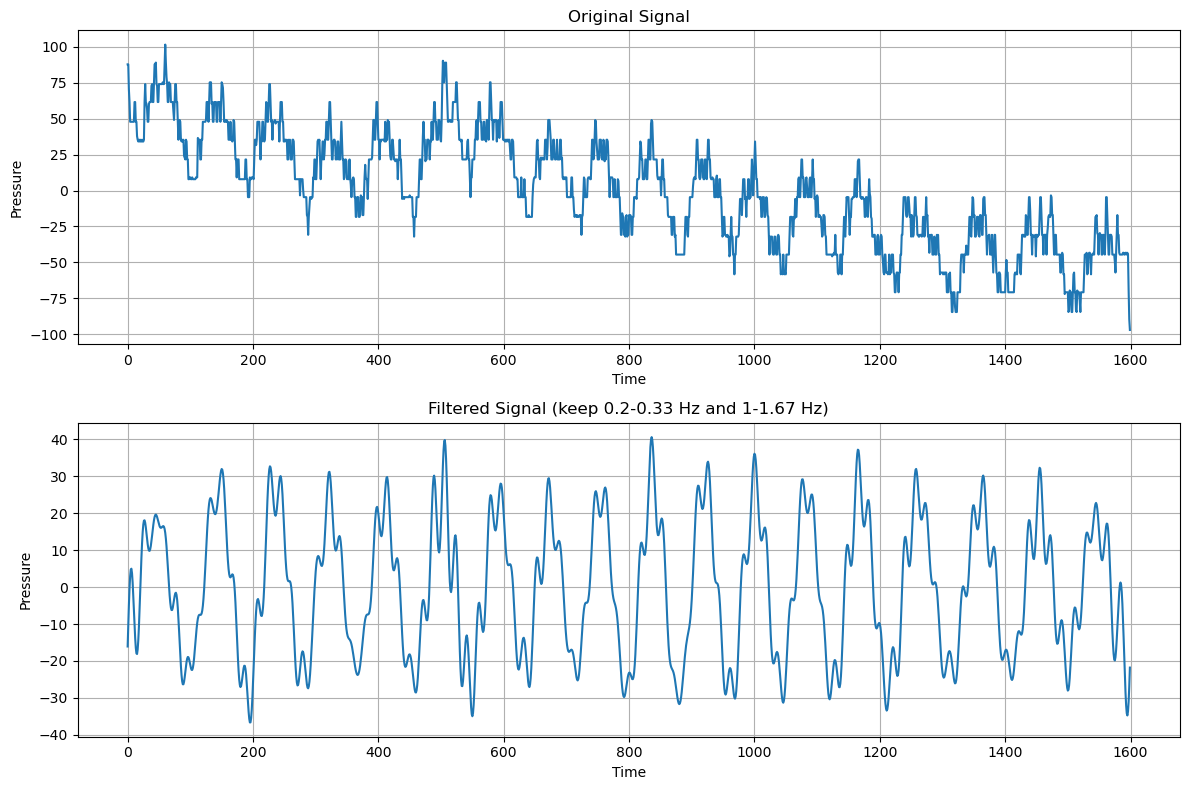

In [10]:
filtered_fft_result = np.zeros_like(fft_result, dtype=complex)  

# 保留 0.2-0.33 Hz 和 1-1.67 Hz 
mask = ((frequencies >= 0.2) & (frequencies <= 0.33)) | ((frequencies >= 1) & (frequencies <= 1.67))
filtered_fft_result[mask] = fft_result[mask]

mask_negative = ((frequencies <= -0.2) & (frequencies >= -0.33)) | ((frequencies <= -1) & (frequencies >= -1.67))
filtered_fft_result[mask_negative] = fft_result[mask_negative]

# 逆傅立叶变换
filtered_signal = np.real(ifft(filtered_fft_result))

plot.plot_original_filtered(barometer_02_6[start:end], filtered_signal)

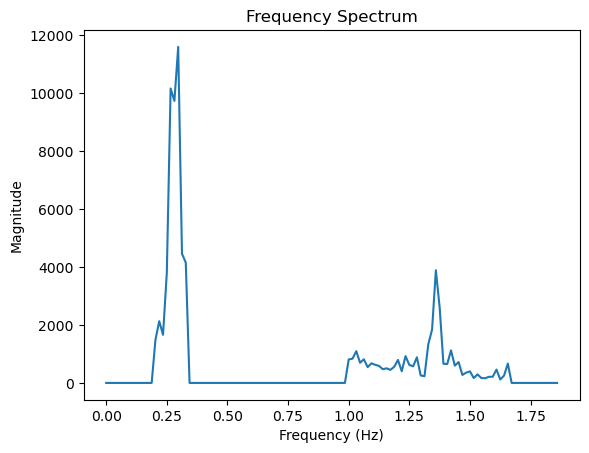

In [9]:
filtered_fft_magnitude = np.abs(filtered_fft_result)
plot.plot_frequency_domaine(frequencies, filtered_fft_magnitude, start_freq=0, end_freq=120)

In [15]:
mask_breath = (frequencies >= 0.2) & (frequencies <= 0.33)
frequencies_breath = frequencies[mask_breath]
max_breath_freq = frequencies_breath[np.argmax(fft_magnitude[mask_breath])]

mask_heartbeat = (frequencies >= 1) & (frequencies <= 1.67)
frequencies_heartbeat = frequencies[mask_heartbeat]
max_heartbeat_freq = frequencies_heartbeat[np.argmax(fft_magnitude[mask_heartbeat])]

print(f"Breath frequency is {max_breath_freq} Hz")
print(f"Breath rate is {60*max_breath_freq}/min ")
print(f"Heartbeat frequency is {max_heartbeat_freq} Hz")
print(f"Heartbeat rate is {60*max_heartbeat_freq}/min ")

Breath frequency is 0.296875 Hz
Breath rate is 17.8125/min 
Heartbeat frequency is 1.359375 Hz
Heartbeat rate is 81.5625/min 
